# Line Graphs, Halmitonian paths and Eulerian paths

### Eulerian Path
An **Eulerian path** in a graph is a path that visits every edge exactly once. An Eulerian circuit or cycle is an Eulerian path which starts and ends on the same vertex. For a graph to contain an Eulerian path, it must satisfy these conditions:
- If zero vertices have odd degree, there exists an Eulerian cycle.
- If exactly two vertices have odd degree, there exists an Eulerian path but not necessarily a cycle.
- If more than two vertices have odd degrees, neither an Eulerian path nor cycle exists.

### Hamiltonian Path
A **Hamiltonian path** is a path in a graph that visits each vertex exactly once. A Hamiltonian circuit or cycle is a Hamiltonian path that returns to the original vertex. Finding such paths or cycles is generally more challenging:
- Determining whether such paths or cycles exist in a given graph is an NP-complete problem, indicating no known polynomial-time algorithm can solve all cases of this problem.

### Line Graph (Graphe Adjoint)
The **line graph** L(G) of a graph G has a vertex set corresponding to the edges of G. Two vertices in L(G) are adjacent if and only if their corresponding edges in G share a common vertex. Essentially, L(G) reflects the adjacency relations between edges of G.

### Connection Between Eulerian and Hamiltonian Paths Through Line Graphs
Understanding the relationship between these paths involves recognizing how properties of G translate into properties of L(G):
- An Eulerian circuit in G implies a Hamiltonian circuit in L(G) because each edge in G is visited exactly once in the Eulerian circuit, thus visiting each vertex in L(G) exactly once.
- Conversely, if L(G) has a Hamiltonian path, the corresponding edges in G form an Eulerian path, considering the way edges are traversed in G to visit every vertex in L(G).

This theoretical interplay illustrates how Eulerian and Hamiltonian paths can reflect deeper structural properties of graphs and their line graphs.


## Step 1 : Graphs representations and practical Demonstration with `networkx`

We will generate random graphs and their corresponding line graphs using `networkx`, then identify Eulerian paths in line graphs and Hamiltonian paths in the original graphs to visually illustrate their theoretical connections.


In [7]:
"""
GLOBAL IMPORTS
"""
import networkx as nx
import matplotlib.pyplot as plt
import random
from typing import Tuple

In [8]:
def generate_random_graph(n: int, m: int) -> nx.Graph:
    """
    Generate a random undirected graph with n nodes and m edges.

    Args:
        n (int): Number of nodes.
        m (int): Number of edges.

    Returns:
        nx.Graph: The generated undirected graph.
    """
    return nx.gnm_random_graph(n, m, directed=False)

In [9]:
def generate_tournament_graph(n: int) -> nx.DiGraph:
    """
    Generate a random tournament graph with n nodes.

    Args:
        n (int): Number of nodes.

    Returns:
        nx.DiGraph: The generated tournament graph.
    """
    G = nx.DiGraph()
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() > 0.5:
                G.add_edge(i, j)
            else:
                G.add_edge(j, i)
    return G

In [10]:
def check_eulerian_path(graph: nx.Graph):
    """
    Check if the given graph has an Eulerian path or circuit and return the result.

    Args:
        graph (nx.Graph): The graph to check.

    Returns:
        str: A message indicating whether the graph is Eulerian, has an Eulerian path, or neither.
    """
    if nx.is_eulerian(graph):
        return "The graph is Eulerian (has an Eulerian circuit)."
    elif nx.has_eulerian_path(graph):
        return "The graph has an Eulerian path."
    else:
        return "The graph has no Eulerian path or circuit."

In [11]:
def find_hamiltonian_path_tournament(graph: nx.DiGraph) -> str:
    """
    Find a Hamiltonian path in the given tournament graph if possible.

    Args:
        graph (nx.DiGraph): The tournament graph.

    Returns:
        str: A message with the Hamiltonian path if found, otherwise a failure message.
    """
    try:
        path = nx.tournament.hamiltonian_path(graph)
        return f"Hamiltonian Path found: {path}"
    except nx.NetworkXException as e:
        return str(e)

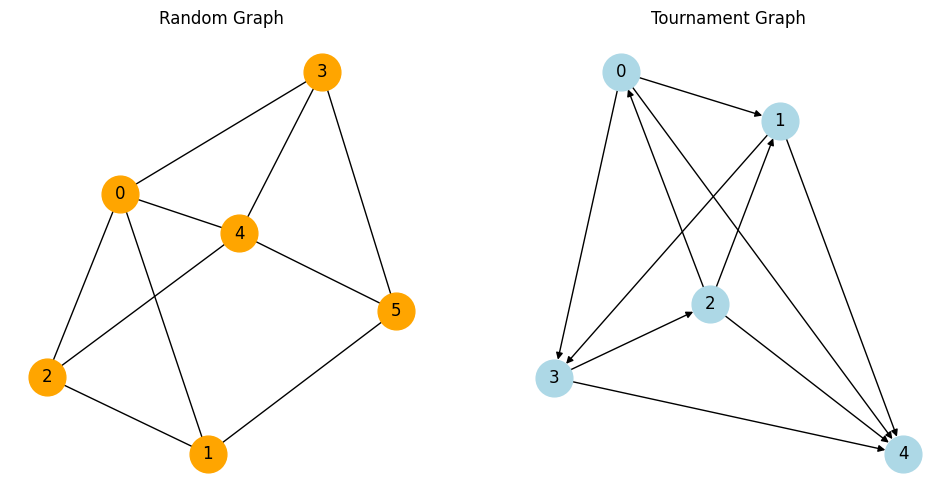

Random graph:  The graph has no Eulerian path or circuit.
Tournament Graph:  Hamiltonian Path found: [0, 1, 3, 2, 4]


In [13]:
# Generate graphs
random_graph = generate_random_graph(6, 10)
tournament_graph = generate_tournament_graph(5)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(random_graph, with_labels=True, node_color='orange', edge_color='black', node_size=700)
plt.title('Random Graph')

plt.subplot(122)
nx.draw(tournament_graph, with_labels=True, node_color='lightblue', edge_color='black', node_size=700, arrows=True)
plt.title('Tournament Graph')
plt.show()

# Check paths
print("Random graph: ", check_eulerian_path(random_graph))
print("Tournament Graph: ",find_hamiltonian_path_tournament(tournament_graph))

### Complementary step : try to find a hamiltonian path in a random graph

**Exploring Hamiltonian Paths in Random Graphs**: The aim was to implement a backtracking method to search for Hamiltonian paths in randomly generated graphs. This method recursively checks each vertex and backtracks when necessary, striving to visit every vertex exactly once to find a viable path, thus demonstrating the computational challenges associated with this NP-complete problem.


In [24]:
def hamiltonian_path_backtracking_search(G: nx.Graph) -> list:
    """
    Attempt to find a Hamiltonian path in the given graph using backtracking.

    Args:
        G (nx.Graph): The graph in which to find a Hamiltonian path.

    Returns:
        list: A list representing the Hamiltonian path if found, empty otherwise.
    """
    n = len(G.nodes())
    path = []

    def backtrack(current, visited):
        nonlocal path
        if len(path) == n:
            return True
        for neighbor in G.neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                path.append(neighbor)
                if backtrack(neighbor, visited):
                    return True
                visited.remove(neighbor)
                path.pop()
        return False

    for start_node in G.nodes():
        visited = {start_node}
        path = [start_node]
        if backtrack(start_node, visited):
            return path  # Return the path directly if found
    return []  # Return an empty list if no Hamiltonian path is found

def find_hamiltonian_path_random(G: nx.Graph) -> str:
    """
    Wrapper function to check for a Hamiltonian path and return the result.

    Args:
        G (nx.Graph): The random graph.

    Returns:
        str: A message with the Hamiltonian path if found, otherwise a failure message.
    """
    path = hamiltonian_path_backtracking_search(G)
    if path:
        return f"Hamiltonian Path found: {path}"
    else:
        return "No Hamiltonian path found."


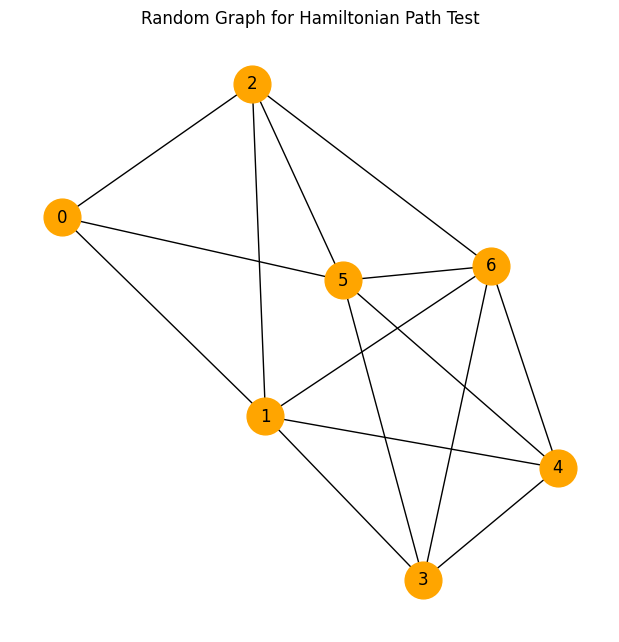

Hamiltonian Path found: [0, 5, 3, 6, 4, 1, 2]


In [25]:
# Generate a random graph
random_graph_for_hamiltonian = generate_random_graph(7, 15)

# Visualization
plt.figure(figsize=(6, 6))
nx.draw(random_graph_for_hamiltonian, with_labels=True, node_color='orange', edge_color='black', node_size=700)
plt.title('Random Graph for Hamiltonian Path Test')
plt.show()

# Check for Hamiltonian path
hamiltonian_result = find_hamiltonian_path_random(random_graph_for_hamiltonian)
print(hamiltonian_result)


## Step 2 : Algorithmic Complexity of Eulerian vs. Hamiltonian Paths

**Eulerian Paths**: The problem of finding an Eulerian path or circuit in a graph is polynomial-time solvable. Algorithms like Hierholzer’s for Eulerian circuits operate in linear time relative to the number of edges, making this problem computationally feasible for large graphs.

**Hamiltonian Paths**: In contrast, determining whether a general graph has a Hamiltonian path is an NP-complete problem. This classification implies no known polynomial-time algorithm can solve all cases, making it computationally intractable for large or complex graphs. This hardness extends to many real-world problems modeled by Hamiltonian paths, such as the traveling salesman problem under certain constraints.

**Comparison and Implications**: While Eulerian paths can often be found efficiently in practical applications, the challenge of finding Hamiltonian paths limits their applicability without heuristic or approximate solutions. This distinction is crucial in fields like network design, logistics, and circuit design, where path feasibility directly impacts operational efficiency.


**Further Example**: A practical application of Hamiltonian paths can be observed in the optimization of printed circuit board (PCB) manufacturing. The challenge in PCB drilling operations involves finding an optimal path that drills all required holes without lifting the drill bit, closely resembling a Hamiltonian path problem. Efficient solutions to this can significantly reduce manufacturing time and costs. Many research papers will explores using genetic algorithms to approximate Hamiltonian paths for this purpose (Yu Cheng Liu, Yu Bin Liu, 2011). This approach has shown promise in reducing operational costs by optimizing drill paths, highlighting the practical value of addressing NP-complete problems in industrial applications.
